<div style="color: #40E0D0; font-family: Cambria, serif; text-align: center; margin: 20px;">

<div style="font-size: 32px; font-weight: bold; margin-bottom: 15px;">Callable Contingent Income Securities due December 3, 2025</div>

<div style="font-size: 18px; margin-bottom: 15px;">
<a href="https://sec.gov/Archives/edgar/data/1666268/000183988223032004/ms75_424b2-16958.htm" style="color: #40E0D0;">SEC Filing Link to the Security
</a>
</div>

<div style="font-size: 24px; font-weight: bold; margin-bottom: 15px;">Payments on the Securities Based on the Worst Performing of the Russell 2000® Index and the S&P 500® Index</div>

<div style="font-style: italic; font-size: 16px;">-Valuation report Python notebook by Yadvesh, Krish and Mayank</div>

</div>

#### Group Members (NetID)
* Krish Desai (kcdesai2)
* Mayank Kalra (mkalra2)
* Yadvesh Yadav (yyada)

---

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">I) Introduction ==></span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Below are the Key Dates of the Note:</span>
</div>

![](./images_project_2/key_dates.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Below are the Note Offering:</span>
</div>

![](./images_project_2/note_offering.png)

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Below are the Observation Dates and Coupon Payment Dates:</span>
</div>

![](./images_project_2/obs_cpn_dates.png)

---

<div style="border-bottom: 3px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">II) Bloomberg Data (Risk-Free Rates(OIS), Dividend Yields, Volatality Matrices and Correlation Factors) is as follows ==> </span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) Risk Free Rate (OIS Rate):</span>
</div>

![](./images_project_2/ois_rates.png)

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2) Dividend Yields for both indices:</span>
</div>

<table style="width:80%; margin:auto; border-collapse: separate; border-spacing: 80px 0;"><tr>
<td style="width:50%; border:none;">
    <div style="border-bottom: 2px solid black; display: inline-block;">
        <span style="font-family: Cambria, serif; font-weight: bold; font-size: 18px;">2.1) Russell 2000® Index (RTY):</span>
    </div>
    <img src="./images_project_2/rty_div.png" style="width:100%">
</td>
<td style="width:50%; border:none;">
    <div style="border-bottom: 2px solid black; display: inline-block;">
        <span style="font-family: Cambria, serif; font-weight: bold; font-size: 18px;">2.2) S&P 500® Index (SPX):</span>
    </div>
    <img src="./images_project_2/spx_div.png" style="width:100%">
</td>
</tr></table>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) Implied Volatality Matrices for both indices:</span>
</div>

<table style="width:100%; margin:auto;"><tr>
<td style="width:100%; border:none; padding-bottom: 30px;">
    <div style="border-bottom: 2px solid black; display: inline-block;">
        <span style="font-family: Cambria, serif; font-weight: bold; font-size: 18px;">3.1) Russell 2000® Index (RTY):</span>
    </div>
    <img src="./images_project_2/rty_vol.png" style="width:100%">
</td>
</tr>
<tr>
<td style="width:100%; border:none;">
    <div style="border-bottom: 2px solid black; display: inline-block;">
        <span style="font-family: Cambria, serif; font-weight: bold; font-size: 18px;">3.2) S&P 500® Index (SPX):</span>
    </div>
    <img src="./images_project_2/spx_vol.png" style="width:100%">
</td>
</tr></table>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">III) Getting the Risk-free rates from discount factors above ==></span>
</div>

In [66]:
# Importing Necessary Libraries
from datetime import datetime
import calendar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# function to get fractional difference between two dates
def get_year_fraction(start_date, end_date):
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    total_years = 0.0

    current_date = start_date
    while current_date < end_date:
        year = current_date.year
    
        if year == end_date.year:
            period_end = end_date
        else:
            period_end = datetime(year + 1, 1, 1)

        days_in_period = (period_end - current_date).days
        days_in_year = 366 if calendar.isleap(year) else 365
        total_years += days_in_period / days_in_year
        current_date = period_end
    
    return total_years

In [3]:
# Key dates
T_0 = "2023-11-28"
T_1 = "2023-12-01"
T_2 = "2025-11-28"
T_3 = "2025-12-03"

# Discount Factors at Key Dates
DF_0 = 1
DF_2 = 0.911000

# DF_1 and DF_3 needs to be calculated using Interpolation
# We have:
dt_2023_12_05 = "2023-12-05"
DF_2023_12_05 = 0.998964
dt_2026_11_30 = "2026-11-30"
DF_2026_11_30 = 0.877524

# Now using Interpolation we have:
DF_1 = DF_0 + (DF_2023_12_05 - DF_0)*(get_year_fraction(T_0, T_1))/(get_year_fraction(T_0, dt_2023_12_05))
print(f"The Value of DF_1 is: {DF_1:.6f}\n")
DF_3 = DF_2 + (DF_2026_11_30 - DF_2)*(get_year_fraction(T_2, T_3))/(get_year_fraction(T_2, dt_2026_11_30))
print(f"The Value of DF_3 is: {DF_3:.6f}")

The Value of DF_1 is: 0.999556

The Value of DF_3 is: 0.910544


<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        |
|------|-----------|-----------|
| T_0  | 11/28/2023  | 1.000000  |
| T_1  | 12/01/2023 | 0.999556  |
| T_2  | 11/28/2025 | 0.911000  |
| T_3  | 12/03/2025 | 0.910544  |

</div>

In [4]:
# function to get r(0,T) from the discount factors DF
def r_from_DF(DF, T, T_0):
    dt = get_year_fraction(T_0, T)
    r = -np.log(DF)/dt
    return r, dt

In [5]:
r_T0_T1, T0_T1 = r_from_DF(DF_1, T_1, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: {r_T0_T1:.8f}\n")
r_T0_T2, T0_T2 = r_from_DF(DF_2, T_2, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: {r_T0_T2:.8f}\n")
r_T0_T3, T0_T3 = r_from_DF(DF_3, T_3, T_0)
print(f"The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: {r_T0_T3:.8f}\n")

The Value of continuously compounded risk free rate between T_0 and T_1(r_T0_T1) is: 0.05403200

The Value of continuously compounded risk free rate between T_0 and T_2(r_T0_T2) is: 0.04660619

The Value of continuously compounded risk free rate between T_0 and T_3(r_T0_T3) is: 0.04653782



<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">The Discount Factor Table after Linear Interpolation Looks like this</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   |
|------|-----------|-----------|-----------------|------------|
| T_0  | 11/28/2023  | 1.000000  | 0.00000000     | 0.00000000 |
| T_1  | 12/01/2023 | 0.999556  | 0.00821918     | 0.05403200 |
| T_2  | 11/28/2025 | 0.911000  | 2.00000000     | <span style="background-color: green;">0.04660619</span> |
| T_3  | 12/03/2025 | 0.910544  | 2.01369863     | 0.04653782 |

</div>

In [6]:
# now we need to calculate teh forward rate F(T_1,T_3)
T1_T3 = get_year_fraction(T_1, T_3)
F_T1_T3 = ((r_T0_T3*T0_T3) - (r_T0_T1*T0_T1))/T1_T3
print(f"The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: {F_T1_T3:.8f}\n")

The Value of continuously compounded Forward rate between T_1 and T_3(F_T1_T3) is: 0.04650710



---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">IV) Calculating the correlation between indices (RTY and SPX) for 6M, 12M and 24M time horizons==></span>
</div>

In [7]:
# function to read historical csv and get returns based on index values
def historical_df(file_path):
    df = pd.read_csv(file_path)
    df.set_index('Date', inplace=True)

    if file_path=='./data_project_2/rty_hp.csv':
        df.rename(columns={'px_last': 'px_last_rty'}, inplace=True)
        df['px_last_rty'] = pd.to_numeric(df['px_last_rty'])
        df['px_last_rty_previous'] = df['px_last_rty'].shift(-1)
        df['diff'] = df['px_last_rty'] - df['px_last_rty_previous']
        df['pct_change_rty'] = df['diff']/np.abs(df['px_last_rty_previous'])*100
    else:
        df.rename(columns={'px_last': 'px_last_spx'}, inplace=True)
        df['px_last_spx'] = pd.to_numeric(df['px_last_spx'])
        df['px_last_spx_previous'] = df['px_last_spx'].shift(-1)
        df['diff'] = df['px_last_spx'] - df['px_last_spx_previous']
        df['pct_change_spx'] = df['diff']/np.abs(df['px_last_spx_previous'])*100
    
    df = df.iloc[:,[0,3]]
   
    return df

In [8]:
df_rty = historical_df('./data_project_2/rty_hp.csv')
df_spx = historical_df('./data_project_2/spx_hp.csv')
df_final = pd.merge(df_rty, df_spx, left_index=True, right_index=True, how='inner')

In [9]:
df_final.head()

,px_last_rty,pct_change_rty,px_last_spx,pct_change_spx
Date,,,,
11/28/2023,1792.808,-0.463370,4554.89,0.098013
11/27/2023,1801.154,-0.351093,4550.43,-0.195423
11/24/2023,1807.500,0.666095,4559.34,0.059693
11/22/2023,1795.540,0.688457,4556.62,0.406109
11/21/2023,1783.263,-1.318201,4538.19,-0.202094


In [10]:
# function to calculate the correlations based on historical data
def corr_hp(df_final, horizon_list):

    corr1 = []
    df_final.index = pd.to_datetime(df_final.index)
    final_date = df_final.index[0]
    for i in horizon_list:
        date_hl =  final_date - pd.DateOffset(months=i)
        print(f"The {i} months date before {final_date} is : {date_hl}")

        df_hl = df_final[df_final.index >= date_hl]
        corr_hl = df_hl['pct_change_rty'].corr(df_hl['pct_change_spx'])
        print(f"The correlation for {i} months horizon is: {corr_hl:.6f} \n")
        corr1.append(corr_hl)

    return corr1

In [11]:
corr = corr_hp(df_final, [6, 12, 18, 24])

The 6 months date before 2023-11-28 00:00:00 is : 2023-05-28 00:00:00
The correlation for 6 months horizon is: 0.736798 

The 12 months date before 2023-11-28 00:00:00 is : 2022-11-28 00:00:00
The correlation for 12 months horizon is: 0.825055 

The 18 months date before 2023-11-28 00:00:00 is : 2022-05-28 00:00:00
The correlation for 18 months horizon is: 0.885226 

The 24 months date before 2023-11-28 00:00:00 is : 2021-11-28 00:00:00
The correlation for 24 months horizon is: 0.889623 



---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">1) The Discount Factor Table after Linear Interpolation Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Keys | Dates     | DF        | delta(T_x, T_0) | r(0,T_x)   | F(T_x1,T_x2)   |
|------|-----------|-----------|-----------------|------------| ------------|
| T_0  | 11/28/2023  | 1.000000  | 0.00000000     | 0.00000000 | -  |
| T_1  | 12/01/2023 | 0.999556  | 0.00821918     | 0.05403200 | -  |
| T_2  | 11/28/2025 | 0.911000  | 2.00000000     | <span style="background-color: green;">0.04660619</span> | -  |
| T_3  | 12/03/2025 | 0.910544  | 2.01369863     | 0.04653782 |<span style="background-color: green;">0.04650710</span> |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2.1) The continuous dividend yield 'D1' for RTY Index from bloomberg data is 1.606% or 0.01606</span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">2.2) The continuous dividend yield 'D2' for SPX Index from bloomberg data is 1.598% or 0.01598</span>
</div>

---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">3) The Moneyness and Volatility Matrices Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Moneyness | RTY Implied Volatility (24M) | SPX Implied Volatility (24M) |
|-----------|------------------| ------------------|
| 70.00     | 27.772%         | 25.440%         |
| 75.00     | 26.371%         | 24.080%         |
| 80.00     | 25.104%         | 22.833%         |
| 85.00     | 23.957%         | 21.676%         |
| 90.00     | 22.920%         | 20.542%         |
| 95.00     | 21.980%         | 19.392%         |
| 100.00    | 21.125%         | 18.195%         |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">4) The correlation between indices (RTY and SPX) for 6M, 12M, 18M and 24M time horizons Looks like this:</span>
</div>

<div style="font-family: Cambria, serif;">

| Time horizon | Correlation Factor(rho12)   |
|------|-----------|
| 6M  | 0.736798  |
| 12M | 0.825055 |
| 18M  | 0.885226 |
| 24M | 0.889623 |

</div>

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">V) Now Calculating the Value of the Note using Monte Carlo Simulations ==></span>
</div>

In [12]:
# note feature inputs that will go in the functions to calculate the value of the note

# Number of Trials to run Monte Carlo Simulation
Ntrials = 10
print(f"The number of Trial runs for Monte Carlo Simulations will be: {Ntrials}\n")

# Number of simulations
N = 100000
print(f"The number of Monte Carlo Simulations in each Trial will be: {N}\n")

# Initial Index Values
S10 = 1792.808
S20 = 4554.89
NA = 2
print(f"The number of underlying assets are: {NA}(RTY and SPX)")
print(f"The Initial Index Value for RTY Index is: {S10}\nThe Initial Index Value for SPX Index is: {S20}\n")

# Implied volatalities for each index at 70 Moneyness
sigma1 = 0.27772
sigma2 = 0.25440
print(f"The Implied Volatality for RTY Index at 70 Moneyness is: {sigma1}\nThe Implied Volatality for SPX Index at 70 Moneyness is: {sigma2}\n")

# 12 Month Correlation Factor between RTY and SPX indices
rho12 = 0.825055
print(f"The 12 Month Correlation Factor between RTY and SPX indices is: {rho12}\n")

# continously compounded risk-free rate(T_0 to T_2) for Stock-Tree simulation
r1 = r_T0_T2
print(f"The continously compounded risk-free rate for Stock-Tree simulation is: {r1:.8f}\n")

# continously compounded forward rate(T_1 to T_3) for discounting
r2 = F_T1_T3
print(f"The continously compounded risk-free rate which is used for discounting is: {r2:.8f}\n")

# continuous dividend yields for both indices
D1 = 0.01606
D2 = 0.01598
print(f"The continuous dividend yield for RTY Index is: {D1}\nThe continuous dividend yield for SPX Index is: {D2}\n")

# contingent coupon payment
cpn = 20
print(f"The contingent coupon payment is: ${cpn}\n")

# stated principal amount
principal = 1000
print(f"The stated principal amount is: ${principal}\n")

# coupon barriers for each index
CB1 = 0.70 * S10
CB2 = 0.70 * S20
print(f"The coupon barrier for RTY Index is: {CB1:.3f}\nThe coupon barrier for SPX Index is: {CB2:.3f}\n")

# downside threshold for each index
DT1 = 0.70 * S10
DT2 = 0.70 * S20
print(f"The downside threshold for RTY Index is: {DT1:.3f}\nThe downside threshold for SPX Index is: {DT2:.3f}\n")

The number of Trial runs for Monte Carlo Simulations will be: 10

The number of Monte Carlo Simulations in each Trial will be: 100000

The number of underlying assets are: 2(RTY and SPX)
The Initial Index Value for RTY Index is: 1792.808
The Initial Index Value for SPX Index is: 4554.89

The Implied Volatality for RTY Index at 70 Moneyness is: 0.27772
The Implied Volatality for SPX Index at 70 Moneyness is: 0.2544

The 12 Month Correlation Factor between RTY and SPX indices is: 0.825055

The continously compounded risk-free rate for Stock-Tree simulation is: 0.04660619

The continously compounded risk-free rate which is used for discounting is: 0.04650710

The continuous dividend yield for RTY Index is: 0.01606
The continuous dividend yield for SPX Index is: 0.01598

The contingent coupon payment is: $20

The stated principal amount is: $1000

The coupon barrier for RTY Index is: 1254.966
The coupon barrier for SPX Index is: 3188.423

The downside threshold for RTY Index is: 1254.966
T

In [13]:
# correlation matrix between RTY and SPX indices
rho = [[1, rho12],[rho12, 1]]
print(f"The correlation matrix between RTY and SPX indices is:\n{rho}\n")

# cholesky factorization for calculated correlation between RTY and SPX indices
C = np.linalg.cholesky(rho)
print(f"The cholesky factorization matrix between RTY and SPX indices is:\n{C}\n")

The correlation matrix between RTY and SPX indices is:
[[1, 0.825055], [0.825055, 1]]

The cholesky factorization matrix between RTY and SPX indices is:
[[1.         0.        ]
 [0.825055   0.56505243]]



In [14]:
# function to get fractional difference between two dates
def get_year_fraction(start_date, end_date):
    if isinstance(start_date, str):
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
    if isinstance(end_date, str):
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    
    total_years = 0.0

    current_date = start_date
    while current_date < end_date:
        year = current_date.year
    
        if year == end_date.year:
            period_end = end_date
        else:
            period_end = datetime(year + 1, 1, 1)

        days_in_period = (period_end - current_date).days
        days_in_year = 366 if calendar.isleap(year) else 365
        total_years += days_in_period / days_in_year
        current_date = period_end
    
    return total_years

In [15]:
# The observation and coupon/redemption dates for the note
# observation dates list includes the starting date as well to account for the calculation of time period in between
observation_dates = [
    "2023-11-28",
    "2024-02-28",
    "2024-05-28",
    "2024-08-28",
    "2024-11-29",
    "2025-02-28",
    "2025-05-28",
    "2025-08-28",
    "2025-11-28"
]

cpn_rdm_dates = [
    "2024-03-04",
    "2024-05-31",
    "2024-09-03",
    "2024-12-04",
    "2025-03-05",
    "2025-06-02",
    "2025-09-03",
    "2025-12-03"
]

In [16]:
diff = get_year_fraction("2025-08-28", "2025-11-28")
diff

0.25205479452054796

In [17]:
# Observation Dates in fractional terms
M = []
for i in range(len(observation_dates) -1):
    diff = get_year_fraction(observation_dates[i], observation_dates[i+1])
    print(f"The difference between {observation_dates[i]} and {observation_dates[i+1]} is: {diff}")
    M.append(diff)

The difference between 2023-11-28 and 2024-02-28 is: 0.2516206302866981
The difference between 2024-02-28 and 2024-05-28 is: 0.2459016393442623
The difference between 2024-05-28 and 2024-08-28 is: 0.25136612021857924
The difference between 2024-08-28 and 2024-11-29 is: 0.2540983606557377
The difference between 2024-11-29 and 2025-02-28 is: 0.2490680440152706
The difference between 2025-02-28 and 2025-05-28 is: 0.24383561643835616
The difference between 2025-05-28 and 2025-08-28 is: 0.25205479452054796
The difference between 2025-08-28 and 2025-11-28 is: 0.25205479452054796


In [18]:
print(len(M), M)

8 [0.2516206302866981, 0.2459016393442623, 0.25136612021857924, 0.2540983606557377, 0.2490680440152706, 0.24383561643835616, 0.25205479452054796, 0.25205479452054796]


In [19]:
# Coupon diff dates to get the discounting date factor moving from redemption/coupon dates to observation dates
cpn_diff = []
for i in range(len(cpn_rdm_dates)):
    diff = get_year_fraction(observation_dates[i+1], cpn_rdm_dates[i])
    print(f"The difference between {observation_dates[i+1]} and {cpn_rdm_dates[i]} is: {diff}")
    cpn_diff.append(diff)

The difference between 2024-02-28 and 2024-03-04 is: 0.01366120218579235
The difference between 2024-05-28 and 2024-05-31 is: 0.00819672131147541
The difference between 2024-08-28 and 2024-09-03 is: 0.01639344262295082
The difference between 2024-11-29 and 2024-12-04 is: 0.01366120218579235
The difference between 2025-02-28 and 2025-03-05 is: 0.0136986301369863
The difference between 2025-05-28 and 2025-06-02 is: 0.0136986301369863
The difference between 2025-08-28 and 2025-09-03 is: 0.01643835616438356
The difference between 2025-11-28 and 2025-12-03 is: 0.0136986301369863


In [20]:
print(len(cpn_diff), cpn_diff)

8 [0.01366120218579235, 0.00819672131147541, 0.01639344262295082, 0.01366120218579235, 0.0136986301369863, 0.0136986301369863, 0.01643835616438356, 0.0136986301369863]


In [21]:
# sigma moneyness dict for both the indices
sigma1_moneyness = {
    70.00: 0.27772,
    100.00: 0.21125
}

sigma2_moneyness = {
    70.00: 0.25440,
    100.00: 0.18195
}

rho_map = {
    '6M': 0.736798,
    '12M': 0.825055,
    '18M': 0.885226,
    '24M': 0.889623,
}

In [22]:
# function definition to calculate the note value
def note_value(N, Ntrials, sigma1, sigma2, rho12):

    # initializing RTY and SPX index and Note payoff simulations
    S1 = np.zeros([N+1,len(M)+1])
    S2 = np.zeros([N+1,len(M)+1])
    V = np.zeros([N+1,len(M)+1])
    pathCV = np.zeros([N+1,len(M)+1])
    cpn_val = np.zeros([N+1,len(M)+1])
    hatCV_arr = np.zeros([N+1,len(M)+1])
    call_arr = np.zeros([N+1,len(M)+1])

    rho = [[1, rho12],[rho12, 1]]

    C = np.linalg.cholesky(rho)

    Note_vals = []
    for trial in range(1, Ntrials+1):
        # loop for stock simulationa and payoff at maturity
        for i in range(0, N+1):
            # initialization for both underlyings for each simulation n
            S1[i,0] = S10
            S2[i,0] = S20
            
            for j in range(1, len(M)+1):
                phi = []
                for z in range(0, NA):
                    phi.append(np.random.normal(0,1))
                diffusion = np.matmul(C,phi)
                S1[i,j] = S1[i,j-1]*np.exp(((r1-D1-0.5*sigma1**2)*M[j-1])+(sigma1*np.sqrt(M[j-1])*diffusion[0]))
                S2[i,j] = S2[i,j-1]*np.exp(((r1-D2-0.5*sigma2**2)*M[j-1])+(sigma2*np.sqrt(M[j-1])*diffusion[1]))

            # payoff at maturity
            # final value of either underlying index to be greater or equal than than 0.7 of initial level
            if (S1[i, len(M)] >= DT1) and (S2[i, len(M)] >= DT2):
                # discounting back from December 3rd 2025 to Final observation date November 28 2025
                V[i, len(M)] = (principal + cpn)*np.exp(-r2*cpn_diff[-1])

            # final value of either underlying index to be less than than 0.7 of initial level
            else:
                # to determine the worst performing index
                worst_performance_factor = np.minimum(((S1[i,len(M)])/(S1[i,0])), ((S2[i,len(M)])/(S2[i,0])))
                V[i, len(M)] = (principal * worst_performance_factor)*np.exp(-r2*cpn_diff[-1])

        #  loop for pathCV calculations and regressions
        for j in range(len(M)-1, 0, -1):
            for i in range(0, N+1):

                # getting the pathCV value by discounting back one period and appending that to pathCV list
                pathCV_val = np.exp(-r2*M[j])*V[i,j+1]
                pathCV[i,j] =  pathCV_val

                # add contingent coupon if both the underlying are above 0.7 of initial level
                if (S1[i, j] >= CB1) and (S2[i,j] >= CB2):
                    # discounting back the coupon from redemption date to observation date
                    cpn_sim = cpn*np.exp(-r2*cpn_diff[j-1])
                else:
                    cpn_sim = 0

                cpn_val[i,j] = cpn_sim

            x = S1[:, j]
            y = S2[:, j]
            z = pathCV[:, j]

            degree = 6
            # polynomial definition and running an OLS regressionn with S1 and S2 cubic polynomila as features and pathCV as target variable
            poly = PolynomialFeatures(degree=degree, include_bias=False)
            X = poly.fit_transform(np.column_stack([x, y]))

            X = sm.add_constant(X)

            model = sm.OLS(z, X)
            results = model.fit()

            # coefficients from model
            params = results.params

            # getting the value of hatCV by multiplying S1 and S2 cubic polynomial matrix with best fit coefficient matrix 
            hatCV = X @ params
            hatCV_arr[:, j] = hatCV

            # defining call amount and discounting that back from redemption date to observation date 
            call_amount = principal*np.exp(-r2*cpn_diff[j-1])
            call_arr[:, j] = call_amount

            for i in range(0, N+1):
                # considering call feature
                if (j>=2) and (hatCV_arr[i,j] > call_arr[i,j]):
                    V[i,j] = call_arr[i,j]
                else:
                    V[i,j] = pathCV[i,j]

                # adding the coupon
                V[i,j] += cpn_val[i,j]
            
                #print(i,j,S1[i,j],S2[i,j],V[i,j],call_arr[i,j],hatCV_arr[i,j])
        # loop for note value calculation
        t = 0
        for i in range(0, N+1): 
            t+=1
            # getting values at t=0
            V[i,0] = np.exp(-r2*M[0])*V[i,1]

        Note_Value = (np.sum(V[:,0])/t)
        Note_vals.append(Note_Value)
    return Note_vals

##### Calculating the note value using Ntrails=10, N = 100000 simulations at moneyness of (70,70) and (100,100) for (RTY,SPX) indices using 24N rho12=0.889623 and averaging the values to get final note value.

In [23]:
Ntrials=10
N=100000
sig1_70 = 0.27772
sig2_70 = 0.25440
sig1_100 = 0.21125
sig2_100 = 0.18195
rho12 = 0.889623

# calculating the note value list for Ntrials at moneyness of (70,70)
Note_val_70_70 = note_value(N, Ntrials, sig1_70, sig2_70, rho12)
print(f"The {Ntrials} Ntrials results for moneyness of (70,70) is:\n{Note_val_70_70}\n")

# calculating the note value list for Ntrials at moneyness of (100,100)
Note_val_100_100 = note_value(N, Ntrials, sig1_100, sig2_100, rho12)
print(f"The {Ntrials} Ntrials results for moneyness of (100,100) is:\n{Note_val_100_100}\n")

# averaging values for (70,70) and (100,100) at each trial
final_note_value = [(a + b)/2 for a, b in zip(Note_val_70_70, Note_val_100_100)]

# calculating the average between (70,70) and (100,100)
final_note_value_avg = np.mean(final_note_value)
print(f"The estimated fair value of the note by mean at moneyness (70,70) and (100,100) is: ${final_note_value_avg:.3f}")

The 10 Ntrials results for moneyness of (70,70) is:
[948.2609037869206, 946.9520637513741, 948.6716950347819, 949.4661614133356, 949.0847494268436, 949.6314880441469, 946.7521632016219, 948.5800221068375, 947.4473781079292, 947.2278539744651]

The 10 Ntrials results for moneyness of (100,100) is:
[991.9878096408263, 992.4506554580826, 991.8311241783199, 992.6488418476338, 991.1340682173001, 991.7402865526709, 991.5793645732186, 991.2908132784315, 991.508474077965, 991.3679086701175]

The estimated fair value of the note by mean at moneyness (70,70) and (100,100) is: $969.981


<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px; background-color: green;">The estimated fair value of the note by mean at moneyness (70,70) and (100,100) is: $ 969.981</span>

</div>

#### Error Analysis taking the exact value of the note as $972.40

In [24]:
# creating a dataframe to do error analysis
df = pd.DataFrame(final_note_value, columns=['Monte Values'])
df['Exact Note Value'] = 972.40
df['Errors'] = df['Monte Values'] - df['Exact Note Value']
df

,Monte Values,Exact Note Value,Errors
0,970.124357,972.4,-2.275643
1,969.701360,972.4,-2.698640
2,970.251410,972.4,-2.148590
3,971.057502,972.4,-1.342498
4,970.109409,972.4,-2.290591
5,970.685887,972.4,-1.714113
6,969.165764,972.4,-3.234236
7,969.935418,972.4,-2.464582
8,969.477926,972.4,-2.922074
9,969.297881,972.4,-3.102119


In [25]:
print(f"Mean Error is: {df['Errors'].mean()};\nand Standard Deviation of Errors is: {df['Errors'].std()}")

Mean Error is: -2.4193087328588376;
and Standard Deviation of Errors is: 0.5991200157551931


### Here we see that the mean error is -2.564 and Standard deviation is 0.552. This is beacuse we do not know the volatalities of each underlying asset and the correlation factor. So for these fixed values we get the above results

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">VI) Sensitivity Analysis ==></span>
</div>

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">i) Varying simulations N = [10, 100, 500, 1000, 5000, 10000, 20000, 30000, 50000] for Ntrials=3, Moneyness is average between (70,70) and (100,100) and 24M rh012=0.889623 ==></span>
</div>

In [26]:
def note_N_sim(N):

    Ntrials=3
    sig1_70 = 0.27772
    sig2_70 = 0.25440
    sig1_100 = 0.21125
    sig2_100 = 0.18195
    rho12 = 0.889623

    # calculating the note value list for Ntrials at moneyness of (70,70)
    Note_val_70_70 = note_value(N, Ntrials, sig1_70, sig2_70, rho12)

    # calculating the note value list for Ntrials at moneyness of (100,100)
    Note_val_100_100 = note_value(N, Ntrials, sig1_100, sig2_100, rho12)

    # averaging values for (70,70) and (100,100) at each trial
    final_note_value = [(a + b)/2 for a, b in zip(Note_val_70_70, Note_val_100_100)]

    # calculating the average between (70,70) and (100,100)
    final_note_value_avg = np.mean(final_note_value)
    output = {'Simulations': N, 'Note Value': final_note_value_avg}
    print(output)

    return output

In [27]:
sim_sen = []
N_sim = [10, 100, 500, 1000, 5000, 10000, 20000, 30000, 50000]
for i in N_sim:
    sim_sen.append(note_N_sim(i))

{'Simulations': 10, 'Note Value': 962.5948148936908}
{'Simulations': 100, 'Note Value': 969.4230262675902}
{'Simulations': 500, 'Note Value': 970.4721499540741}
{'Simulations': 1000, 'Note Value': 968.0892130493254}
{'Simulations': 5000, 'Note Value': 970.9382591946566}
{'Simulations': 10000, 'Note Value': 969.1410705833528}
{'Simulations': 20000, 'Note Value': 970.1705800161948}
{'Simulations': 30000, 'Note Value': 970.1029821293005}
{'Simulations': 50000, 'Note Value': 970.0335949897649}


In [28]:
# Taking the exact value of the note as $972.40. Doing the error analysis for different simulation steps
df_n_sim = pd.DataFrame.from_dict(sim_sen)
df_n_sim['Exact Note Value'] = 972.40
df_n_sim['Errors'] = df_n_sim['Note Value'] - df_n_sim['Exact Note Value']
df_n_sim

,Simulations,Note Value,Exact Note Value,Errors
0,10,962.594815,972.4,-9.805185
1,100,969.423026,972.4,-2.976974
2,500,970.472150,972.4,-1.927850
3,1000,968.089213,972.4,-4.310787
4,5000,970.938259,972.4,-1.461741
5,10000,969.141071,972.4,-3.258929
6,20000,970.170580,972.4,-2.229420
7,30000,970.102982,972.4,-2.297018
8,50000,970.033595,972.4,-2.366405


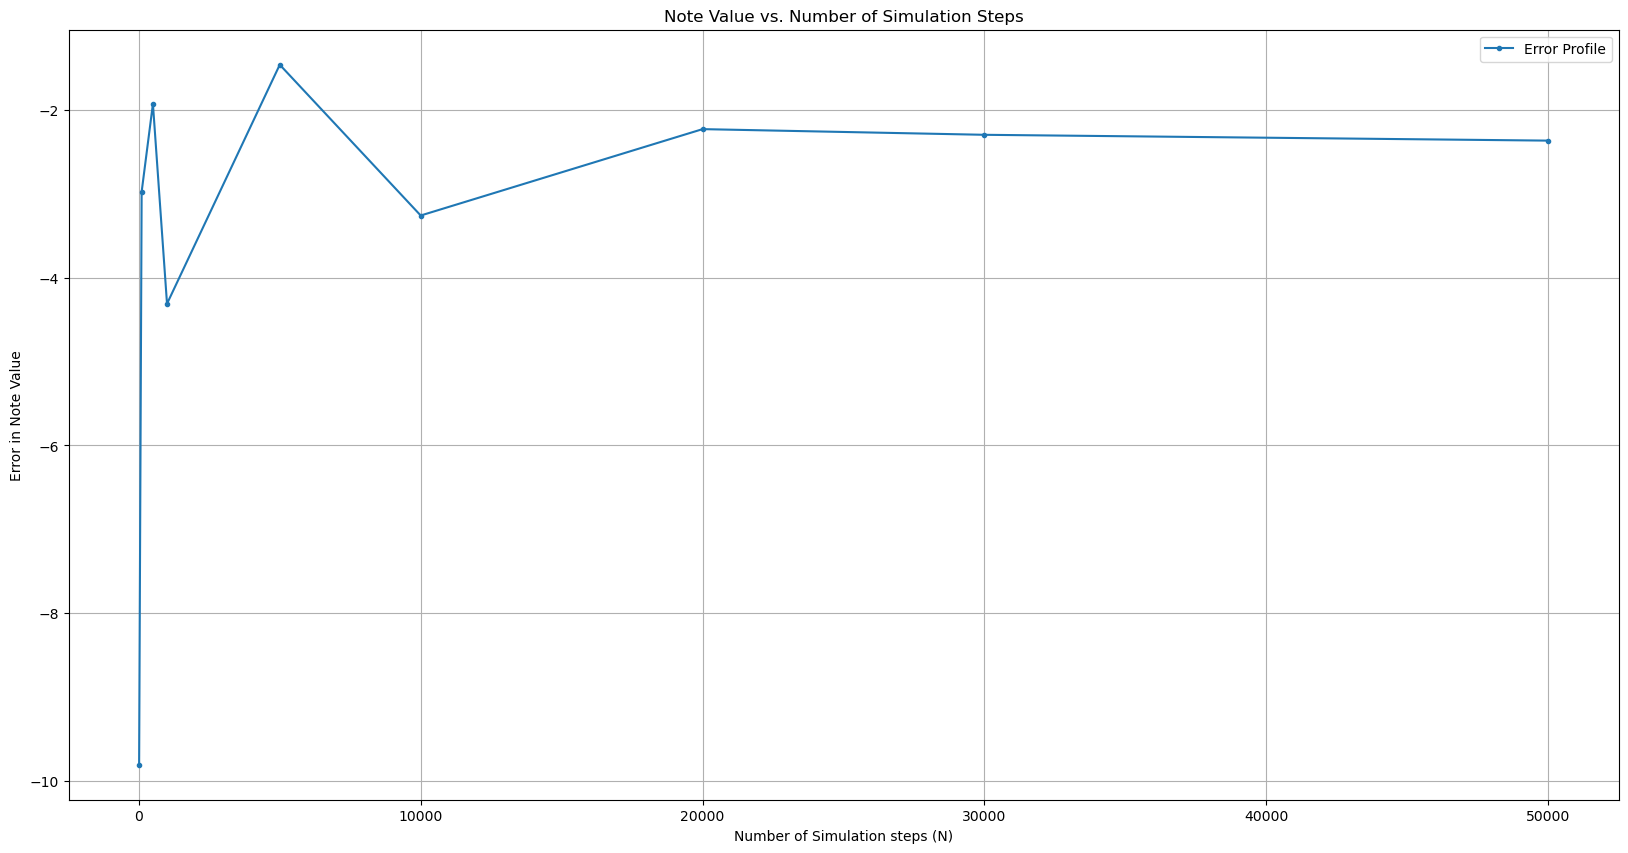

In [63]:
# plotting the error results
plt.figure(figsize=(20, 10))
plt.plot(df_n_sim['Simulations'],df_n_sim['Errors'],'o-', markersize=3, label='Error Profile')
plt.xlabel('Number of Simulation steps (N)')
plt.ylabel('Error in Note Value')
plt.title('Note Value vs. Number of Simulation Steps')
plt.legend()
plt.grid(True)
plt.show()

---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">ii) Varying sigma1 and sigma2 from (70,70) moneyness to (100,100) moneyness for Ntrials=3, N=10000 and 24M rh012=0.889623 ==></span>
</div>

In [30]:
def note_sig1_sim(sig1, sig2):

    Ntrials=3
    rho12 = 0.889623

    # calculating the note value list for Ntrials at moneyness of (70,70)
    Note_val = note_value(N, Ntrials, sig1, sig2, rho12)
    output = {'Sigma1': sig1, 'Sigma2': sig2, 'Note Value': Note_val}
    print(output)

    return output

In [31]:
Ntrials=3
N=10000
rho12 = 0.889623
sigma1_moneyness = {
70.00: 0.27772,
75.00: 0.26396,
80.00: 0.25104,
85.00: 0.23957,
90.00: 0.22920,
95.00: 0.21980,
100.00: 0.21125
}

sigma2_moneyness = {
70.00: 0.25440,
75.00: 0.24080,
80.00: 0.22833,
85.00: 0.21676,
90.00: 0.20542,
95.00: 0.19392,
100.00: 0.18195
}

sig1_values = list(sigma1_moneyness.values())
sig2_values = list(sigma2_moneyness.values())

In [32]:
X, Y = np.meshgrid(sig1_values, sig2_values)
Z = np.zeros_like(X)

In [33]:
for i, sig2 in enumerate(sig2_values):
    for j, sig1 in enumerate(sig1_values):
        result = np.mean(note_value(N, Ntrials, sig1, sig2, rho12))
        Z[i, j] = result

In [34]:
# exact note value is $972.4
exact_value = 972.4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Parameters closest to exact value of $972.4 for 10000 simulations:
Moneyness 1: 90.00 (Sigma1: 0.22920)
Moneyness 2: 80.00 (Sigma2: 0.22833)
Estimated Fair Note Value: 972.48808
Difference from exact value: 0.08808


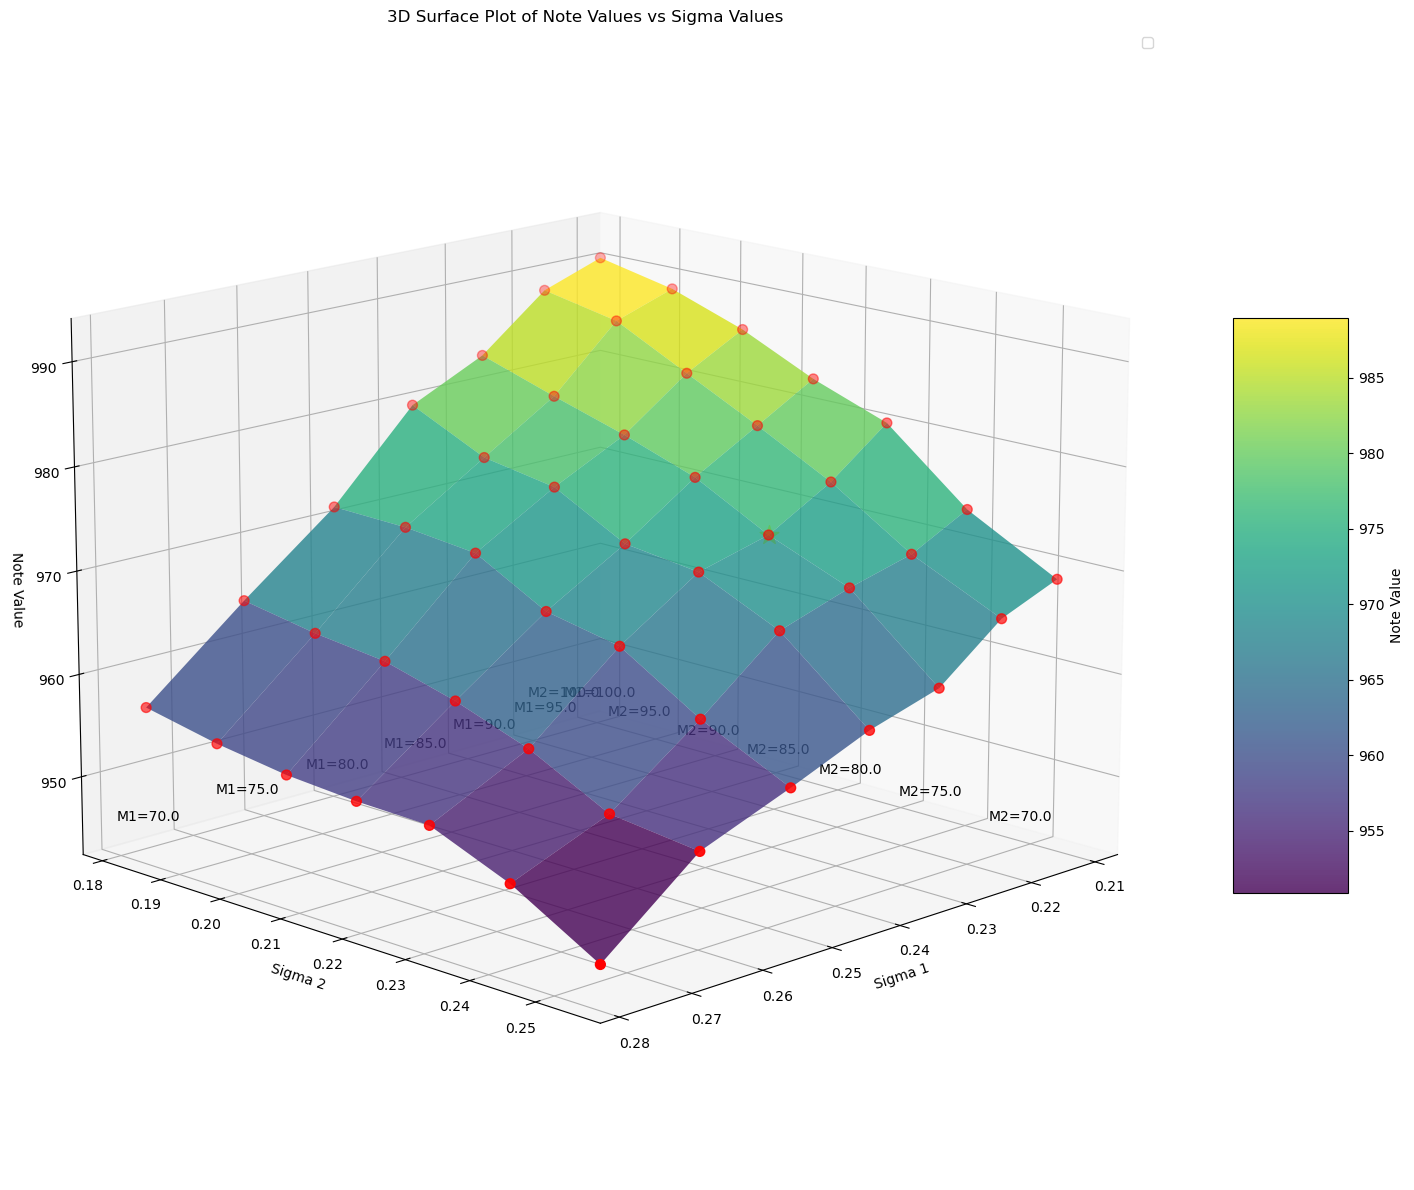

In [67]:
# plotting the results
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Note Value')
scatter = ax.scatter(X, Y, Z, c='red', s=50)
differences = np.abs(Z - exact_value)
closest_idx = np.unravel_index(np.argmin(differences), Z.shape)
closest_sig1 = X[closest_idx]
closest_sig2 = Y[closest_idx]
closest_value = Z[closest_idx]
closest_moneyness1 = min(sigma1_moneyness.items(), key=lambda x: abs(x[1] - closest_sig1))[0]
closest_moneyness2 = min(sigma2_moneyness.items(), key=lambda x: abs(x[1] - closest_sig2))[0]
ax.set_xlabel('Sigma 1')
ax.set_ylabel('Sigma 2')
ax.set_zlabel('Note Value')
ax.set_title('3D Surface Plot of Note Values vs Sigma Values')
ax.view_init(elev=15, azim=45)

print(f"\nParameters closest to exact value of ${exact_value} for {N} simulations:")
print(f"Moneyness 1: {closest_moneyness1:.2f} (Sigma1: {closest_sig1:.5f})")
print(f"Moneyness 2: {closest_moneyness2:.2f} (Sigma2: {closest_sig2:.5f})")
print(f"Estimated Fair Note Value: {closest_value:.5f}")
print(f"Difference from exact value: {abs(closest_value - exact_value):.5f}")

ax.scatter([closest_sig1], [closest_sig2], [closest_value], c='yellow', s=200, marker='*')
for i, sig1 in enumerate(sig1_values):
    moneyness = list(sigma1_moneyness.keys())[i]
    ax.text(sig1, min(sig2_values), min(Z.flatten()), f'M1={moneyness}', horizontalalignment='center')

for i, sig2 in enumerate(sig2_values):
    moneyness = list(sigma2_moneyness.keys())[i]
    ax.text(min(sig1_values), sig2, min(Z.flatten()), f'M2={moneyness}', horizontalalignment='right')

plt.legend()
plt.tight_layout()
plt.show()

##### Calculating the note value using the optimal parameters from above with Ntrails=10, N = 100000 simulations at moneyness of (90,80) for (RTY,SPX) indices[from above step] using 24N rho12=0.889623 and averaging the values to get final note value.

In [40]:
Ntrials=10
N=100000
sig1 = 0.22920
sig2 = 0.22833
rho12 = 0.889623

mon1 = next(k for k, v in sigma1_moneyness.items() if v == sig1)
mon2 = next(k for k, v in sigma2_moneyness.items() if v == sig2)
# calculating the note value list for Ntrials at moneyness of (95,75)
Note_val = note_value(N, Ntrials, sig1, sig2, rho12)
print(f"The {Ntrials} Ntrials results for moneyness of ({mon1},{mon2}) is:\n{Note_val}\n")

final_note_value_avg = np.mean(Note_val)
print(f"The estimated fair value of the note by mean at moneyness of ({mon1},{mon2}) is: ${final_note_value_avg:.3f}")

The 10 Ntrials results for moneyness of (90.0,80.0) is:
[973.7126776403237, 974.8854891441982, 973.4151911251988, 975.2715082705841, 972.3141908605601, 973.688198568071, 974.1382203196321, 973.7391025991083, 975.2355230219554, 973.6819583494005]

The estimated fair value of the note by mean at moneyness of (90.0,80.0) is: $974.008


---

<div style="border-bottom: 2px solid black; display: inline-block;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">iii) Varying rho12 = [0.736798, 0.825055, 0.885226, 0.889623] for moneyness of (70,70), (70,100), (100,70), (100,100) and (90,80) for Ntrials=3 and N=10000 ==></span>
</div>

In [41]:
Ntrials=3
N=10000
sig1 = [0.27772, 0.22920, 0.21125]
sig2 = [0.25440, 0.22833, 0.18195]
rho_loop = [0.736798, 0.825055, 0.885226, 0.889623]

In [42]:
Note_dict_70_70 = {}
Note_dict_70_100 = {}
Note_dict_100_70 = {}
Note_dict_100_100 = {}
Note_dict_90_80 = {}
for i in rho_loop:
    # getting time horizon value from rho_map
    rho_val = next(k for k, v in rho_map.items() if v == i)

    # calculating Note Value for (70,70) moneyness
    Note_val_70_70 = note_value(N, Ntrials, sig1[0], sig2[0], i)
    Note_dict_70_70[rho_val] = Note_val_70_70
    
    # calculating Note Value for (70,100) moneyness
    Note_val_70_100 = note_value(N, Ntrials, sig1[0], sig2[2], i)
    Note_dict_70_100[rho_val] = Note_val_70_100
    
    # calculating Note Value for (100,70) moneyness
    Note_val_100_70 = note_value(N, Ntrials, sig1[2], sig2[0], i)
    Note_dict_100_70[rho_val] = Note_val_100_70
    
    # calculating Note Value for (100,100) moneyness
    Note_val_100_100 = note_value(N, Ntrials, sig1[2], sig2[2], i)
    Note_dict_100_100[rho_val] = Note_val_100_100
    
    # calculating Note Value for (95,75) moneyness
    Note_val_90_80 = note_value(N, Ntrials, sig1[1], sig2[1], i)
    Note_dict_90_80[rho_val] = Note_val_90_80

In [43]:
# averaging the Ntrials values for each rho12
avg_70_70 = {k: np.mean(v) for k, v in Note_dict_70_70.items()}
avg_70_100 = {k: np.mean(v) for k, v in Note_dict_70_100.items()}
avg_100_70 = {k: np.mean(v) for k, v in Note_dict_100_70.items()}
avg_100_100 = {k: np.mean(v) for k, v in Note_dict_100_100.items()}
avg_90_80 = {k: np.mean(v) for k, v in Note_dict_90_80.items()}

In [44]:
# creating dataframe for all the above calculated values

df_rho_sen = pd.DataFrame({
   '(RTY:70),(SPX:70)': avg_70_70,
   '(RTY:70),(SPX:100)': avg_70_100,
   '(RTY:100),(SPX:70)': avg_100_70,
   '(RTY:100),(SPX:100)': avg_100_100,
   '(RTY:90),(SPX:80)': avg_90_80
}).T

df_rho_sen.columns.name = 'Rho Time Horizon'
df_rho_sen.index.name = '(sigma1,sigma2) levels'

In [45]:
print(df_rho_sen)

Rho Time Horizon                6M         12M         18M         24M
(sigma1,sigma2) levels                                                
(RTY:70),(SPX:70)       937.091646  941.220129  946.811798  947.114936
(RTY:70),(SPX:100)      952.022999  954.485154  955.835036  958.130495
(RTY:100),(SPX:70)      962.017429  966.007797  968.702326  968.677236
(RTY:100),(SPX:100)     986.729751  989.125877  991.535991  990.181037
(RTY:90),(SPX:80)       965.535244  968.410360  973.022610  974.180866


<div style="border-bottom: 2px solid black; display: inline-block; margin-bottom: 20px;"> <span style="font-family: Cambria, serif; font-weight: bold; font-size: 20px;">Rho Time Horizon Table:</span> </div> <div style="font-family: Cambria, serif;"> <table border="1" style="border-collapse: collapse; width: 100%;"> <thead> <tr style="background-color: #088F8F;"> <th>Rho Time Horizon</th> <th>6M</th> <th>12M</th> <th>18M</th> <th>24M</th> </tr> </thead> <tbody> <tr> <td>(RTY:70), (SPX:70)</td> <td>937.091646</td> <td>941.220129</td> <td>946.811798</td> <td>947.114936</td> </tr> <tr> <td>(RTY:70), (SPX:100)</td> <td>952.022999</td> <td>954.485154</td> <td>955.835036</td> <td>958.130495</td> </tr> <tr> <td>(RTY:100), (SPX:70)</td> <td>962.017429</td> <td>966.007797</td> <td>968.702326</td> <td>968.677236</td> </tr> <tr> <td>(RTY:100), (SPX:100)</td> <td>986.729751</td> <td>989.125877</td> <td>991.535991</td> <td>990.181037</td> </tr> <tr> <td>(RTY:90), (SPX:80)</td> <td>965.535244</td> <td>968.410360</td> <td>973.022610</td> <td>974.180866</td> </tr> </tbody> </table> </div>

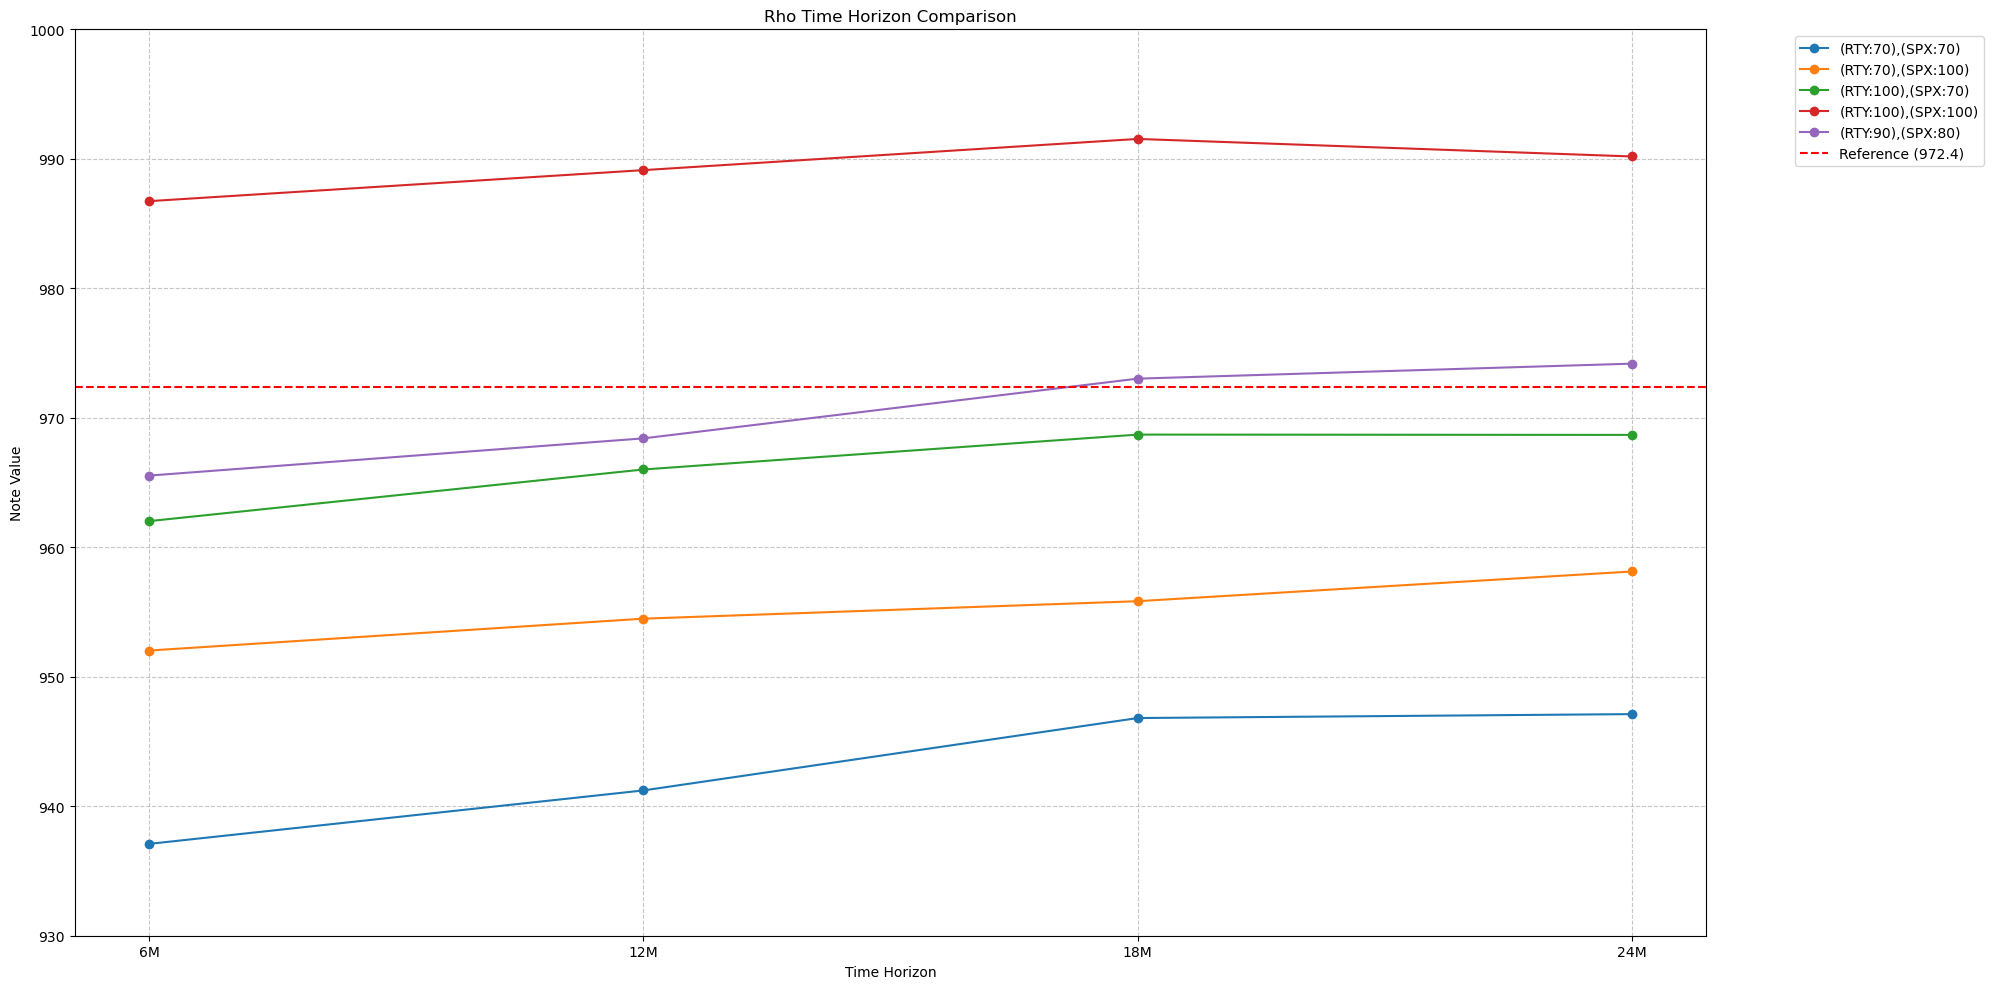

In [65]:
# plotting the results
plt.figure(figsize=(20, 10))
for idx in df_rho_sen.index:
    plt.plot(['6M', '12M', '18M', '24M'], df_rho_sen.loc[idx, ['6M', '12M', '18M', '24M']], marker='o', label=idx)

plt.axhline(y=972.4, color='r', linestyle='--', label='Reference (972.4)')
plt.title('Rho Time Horizon Comparison')
plt.xlabel('Time Horizon')
plt.ylabel('Note Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(930, 1000)
plt.tight_layout()
plt.show()

#### We can clearly see here that as the rho12 time horizon increases the value of note also increases this is because when the two underlying indices are positively correlated the indices are less likely to diverge significantly decreases the risk that one index will perform much worse than the other and this generally leads to a higher valuation of the note.

---

<div style="border-bottom: 2px solid black; display: inline-block; text-align: center; margin: 20px;">
<span style="font-family: Cambria, serif; font-weight: bold; font-size: 28px;">End of Project 2</span>
</div>

---